# EDA

EDA Propuesto:

a) Revisar la tabla reviews.CSV:

Comprobar el contenido de las columnas, dimensiones, y valores nulos.

Verificar la cantidad y longitud de las reseñas (text).

Evaluar la distribución de las calificaciones (rating).

Identificar cuántas reseñas tienen texto frente a cuántas solo tienen calificaciones.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA reviews.CSV

Este análisis inicial incluirá:

Cargar y explorar los datos:

Examinar las dimensiones y columnas.

Analizar valores nulos o inconsistentes.

Revisar el contenido textual (text) y las calificaciones (rating).

Distribución de las calificaciones y texto.


In [61]:
# Cargar el archivo con el delimitador correcto
reviews_df = pd.read_csv('reviews.CSV', delimiter=';')

# Verificar las primeras filas nuevamente
print(reviews_df.head())


   Unnamed: 0  id_user                            id_business  rating  \
0           0        1  0x8894b5a7a7909725:0xe4687299fd288188       5   
1           3        2  0x8894b5a7a7909725:0xe4687299fd288188       1   
2           6        3  0x8894b5a7a7909725:0xe4687299fd288188       5   
3           9        4  0x8894b5a7a7909725:0xe4687299fd288188       5   
4          12        5  0x8894b5a7a7909725:0xe4687299fd288188       5   

                                                text                     date  \
0  The salads were lackluster though with well wr...  2018-09-17 14:51:08.022   
1  Love this place. Great little restaurant, with...  2018-09-20 00:12:47.631   
2  A classy restaurant to match the charm of the ...  2018-08-22 11:13:16.392   
3                     Great atmosphere and good food  2019-04-17 01:25:32.274   
4                                          Good food  2019-05-20 22:42:50.993   

   id  
0   1  
1   2  
2   3  
3   4  
4   5  


In [62]:
reviews_df = reviews_df.drop(columns=['Unnamed: 0'])

In [63]:
print(reviews_df.head())

   id_user                            id_business  rating  \
0        1  0x8894b5a7a7909725:0xe4687299fd288188       5   
1        2  0x8894b5a7a7909725:0xe4687299fd288188       1   
2        3  0x8894b5a7a7909725:0xe4687299fd288188       5   
3        4  0x8894b5a7a7909725:0xe4687299fd288188       5   
4        5  0x8894b5a7a7909725:0xe4687299fd288188       5   

                                                text                     date  \
0  The salads were lackluster though with well wr...  2018-09-17 14:51:08.022   
1  Love this place. Great little restaurant, with...  2018-09-20 00:12:47.631   
2  A classy restaurant to match the charm of the ...  2018-08-22 11:13:16.392   
3                     Great atmosphere and good food  2019-04-17 01:25:32.274   
4                                          Good food  2019-05-20 22:42:50.993   

   id  
0   1  
1   2  
2   3  
3   4  
4   5  


Exploracion inicial

In [64]:
# Verificar dimensiones del DataFrame
print("Dimensiones del DataFrame:", reviews_df.shape)

Dimensiones del DataFrame: (2459709, 6)


In [65]:
# Inspeccionar las primeras y últimas filas

# Primeras filas
print("Primeras filas del DataFrame:")
print(reviews_df.head())

# Últimas filas
print("Últimas filas del DataFrame:")
print(reviews_df.tail())

Primeras filas del DataFrame:
   id_user                            id_business  rating  \
0        1  0x8894b5a7a7909725:0xe4687299fd288188       5   
1        2  0x8894b5a7a7909725:0xe4687299fd288188       1   
2        3  0x8894b5a7a7909725:0xe4687299fd288188       5   
3        4  0x8894b5a7a7909725:0xe4687299fd288188       5   
4        5  0x8894b5a7a7909725:0xe4687299fd288188       5   

                                                text                     date  \
0  The salads were lackluster though with well wr...  2018-09-17 14:51:08.022   
1  Love this place. Great little restaurant, with...  2018-09-20 00:12:47.631   
2  A classy restaurant to match the charm of the ...  2018-08-22 11:13:16.392   
3                     Great atmosphere and good food  2019-04-17 01:25:32.274   
4                                          Good food  2019-05-20 22:42:50.993   

   id  
0   1  
1   2  
2   3  
3   4  
4   5  
Últimas filas del DataFrame:
         id_user                       

In [66]:
# Revisar el tipo de datos de cada columna

# Tipo de datos y resumen
print("Información del DataFrame:")
print(reviews_df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459709 entries, 0 to 2459708
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id_user      int64 
 1   id_business  object
 2   rating       int64 
 3   text         object
 4   date         object
 5   id           int64 
dtypes: int64(3), object(3)
memory usage: 112.6+ MB
None


In [67]:
# Resumen estadístico

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(reviews_df.describe(include='all'))

Estadísticas descriptivas:
             id_user                            id_business        rating  \
count   2.459709e+06                                2459709  2.459709e+06   
unique           NaN                                  46641           NaN   
top              NaN  0x88e77c4f6fd3334b:0x7ddfab24aa1a94c4           NaN   
freq             NaN                                   2925           NaN   
mean    7.135016e+05                                    NaN  4.219284e+00   
std     3.952896e+05                                    NaN  1.155458e+00   
min     1.000000e+00                                    NaN  1.000000e+00   
25%     3.972880e+05                                    NaN  4.000000e+00   
50%     6.920150e+05                                    NaN  5.000000e+00   
75%     1.059105e+06                                    NaN  5.000000e+00   
max     1.436043e+06                                    NaN  5.000000e+00   

             text                     date      

Análisis inicial: 

Columna date:
Es de tipo object. Se recomienda convertirla a datetime para facilitar el análisis.
La fecha más frecuente es 2011-01-01, con 87 ocurrencias. Esto podría ser un dato por defecto o un valor atípico.

Columna text:
Hay 1,465,888 valores no nulos, lo que implica que aproximadamente el 40.4% de las reseñas no tienen texto.

Columna rating:
Las calificaciones oscilan entre 1 y 5, con una media de 4.22. Esto sugiere que las calificaciones tienden a ser positivas.

Columna id_business:
Hay 46,641 negocios únicos, siendo el negocio más frecuentado registrado 2,925 veces.

Columna id_user:
El número máximo de usuarios únicos es 1,436,043, lo que sugiere que algunos usuarios han publicado múltiples reseñas.

Convertir la columna date a datetime. Esto permitirá trabajar con filtros y análisis temporales:

In [68]:
# Convertir la columna 'date' a tipo datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
print("Columna 'date' convertida a datetime.")

Columna 'date' convertida a datetime.


Explorar la distribución de fechas. Esto ayuda a verificar si hay valores atípicos o datos inconsistentes:

In [69]:
# Rango de fechas
print("Rango de fechas:")
print(reviews_df['date'].min(), "a", reviews_df['date'].max())

Rango de fechas:
1990-12-31 00:00:00 a 2021-09-08 19:10:36.560000


El rango de fechas es amplio: 1990-12-31 a 2021-09-08.

Las fechas anteriores al año 2000 podrían ser valores atípicos, ya que la mayoría de las plataformas de reseñas no existían en esa época. Esto podría indicar datos erróneos o un problema de registro.

Inspeccionar la cantidad de datos antiguos para decidir si eliminarlos:

In [70]:
# Filtrar datos previos al 2000
old_reviews = reviews_df[reviews_df['date'] < '2000-01-01']
print(f"Cantidad de reseñas previas al 2000: {len(old_reviews)}")

Cantidad de reseñas previas al 2000: 34


In [71]:
# Eliminar fechas anteriores al 2000
reviews_df = reviews_df[reviews_df['date'] >= '2000-01-01']
print(f"Datos restantes después de filtrar: {reviews_df.shape}")

Datos restantes después de filtrar: (2459675, 6)


Analizar los valores nulos en text:

In [72]:
# Porcentaje de valores nulos en 'text'
missing_text_percentage = reviews_df['text'].isnull().mean() * 100
print(f"Porcentaje de valores nulos en 'text': {missing_text_percentage:.2f}%")

Porcentaje de valores nulos en 'text': 40.40%


El 40.40% de los textos están vacíos.El análisis depende principalmente del contenido textual (análisis de sentimientos), es recomendable eliminarlos.

In [73]:
# Eliminar reseñas sin texto
reviews_textual = reviews_df.dropna(subset=['text'])
print(f"Datos con texto: {reviews_textual.shape}")

Datos con texto: (1465863, 6)


In [74]:
# Distribución de calificaciones
print("Distribución de calificaciones:")
print(reviews_df['rating'].value_counts(normalize=True))

Distribución de calificaciones:
rating
5    0.580053
4    0.219686
3    0.100428
1    0.060673
2    0.039160
Name: proportion, dtype: float64


El 58% de las calificaciones son 5 estrellas, lo que indica una tendencia hacia valoraciones positivas. 
Las calificaciones de 1 y 2 estrellas representan aproximadamente el 10% del total.

Visualizar la distribución para confirmar la concentración y estudiar tendencias por tiempo o negocios:

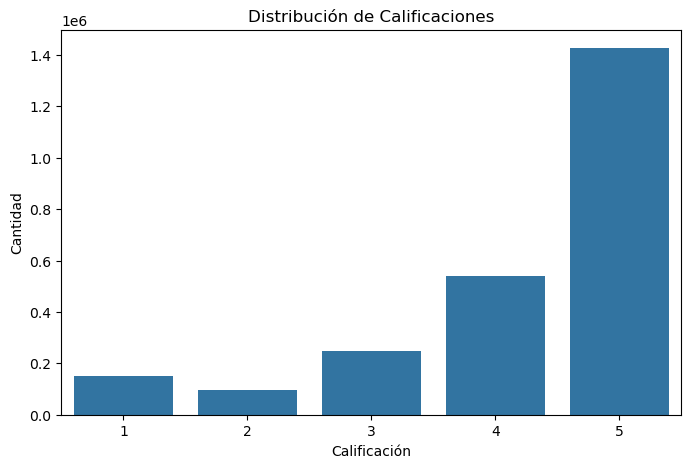

In [75]:
# Visualizar distribución de calificaciones
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews_df, x='rating')
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Cantidad")
plt.show()

Explorar la columna id_business. Identifica negocios más frecuentados y su proporción respecto al total:

In [76]:
# Negocios más frecuentados
top_businesses = reviews_df['id_business'].value_counts().head(10)
print("Negocios más frecuentados:")
print(top_businesses)

Negocios más frecuentados:
id_business
0x88e77c4f6fd3334b:0x7ddfab24aa1a94c4    2925
0x89c80362b0cdd237:0xabf9a07da455e2b3    2345
0x88f540c675a2dc29:0xb33ef6d21124a2b4    2266
0x89c258bc949d5913:0xff63bd615e49b786    2136
0x88dafd498b6d2845:0x96668ee40c965d73    1978
0x89c81d1c03746c37:0xf304365eb9933c9f    1945
0x88e77074501f989b:0x8967d587a146eec9    1888
0x88dd473e41176501:0x9c4ec699dff0ec2c    1872
0x88541c2fc456489b:0x263dc64a613e1e0f    1770
0x88c29a8e0ba3882f:0xc224c8d6504ee594    1681
Name: count, dtype: int64


Los 10 negocios más frecuentados tienen entre 1,681 y 2,925 reseñas cada uno.

Esto podría ser útil para identificar patrones de popularidad y análisis detallado de estos negocios.

Crear un subconjunto con los negocios más frecuentados para análisis en profundidad:


Análisis Temporal

<Axes: title={'center': 'Promedio de Calificaciones por Año'}, xlabel='year'>

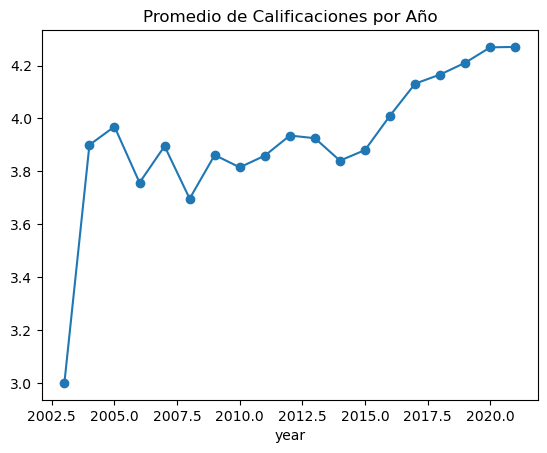

In [78]:
# Agregar columna 'year' para análisis temporal
reviews_textual = reviews_textual.copy()
reviews_textual['year'] = pd.to_datetime(reviews_textual['date']).dt.year
# Agrupar calificaciones por año
ratings_by_year = reviews_textual.groupby('year')['rating'].mean()
ratings_by_year.plot(title="Promedio de Calificaciones por Año", marker='o')


Análisis y Visualización

In [79]:
# Calificaciones promedio por año:Agrupar los datos por año y calcular la media de las calificaciones.
ratings_by_year = reviews_textual.groupby('year')['rating'].mean()
print(ratings_by_year)


year
2003    3.000000
2004    3.900000
2005    3.969231
2006    3.757282
2007    3.895349
2008    3.696774
2009    3.861702
2010    3.815217
2011    3.859347
2012    3.935435
2013    3.925326
2014    3.840441
2015    3.880559
2016    4.010810
2017    4.131544
2018    4.166106
2019    4.210742
2020    4.269006
2021    4.270536
Name: rating, dtype: float64


In [80]:
# Cantidad de reseñas por año: Identificar patrones de actividad en el tiempo.
reviews_count_by_year = reviews_textual.groupby('year').size()
print(reviews_count_by_year)


year
2003         2
2004        30
2005        65
2006       103
2007        86
2008       155
2009       188
2010       736
2011      2268
2012      3934
2013      5745
2014      6988
2015     16820
2016     73265
2017    193358
2018    313480
2019    411309
2020    254065
2021    183266
dtype: int64


Análisis de los Resultados:

1. Promedio de Calificaciones por Año

Observaciones:

Entre 2003 y 2008, el promedio de calificaciones se mantuvo cercano o ligeramente inferior a 4.
A partir de 2016, hay un aumento notable en el promedio de calificaciones, alcanzando su punto más alto en 2021 (4.27).
Este aumento podría reflejar mejoras en la calidad del servicio, sesgo en las calificaciones (usuarios más propensos a dejar opiniones positivas), o cambios en las políticas de calificación de las plataformas.

2. Cantidad de Reseñas por Año

Observaciones:

Hay un aumento exponencial en la cantidad de reseñas desde 2010. Este cambio podría estar relacionado con:

Mayor adopción de plataformas digitales.
Incremento en el uso de smartphones y acceso a internet.
Cambios en la política de incentivos para dejar reseñas.
En 2020, la cantidad de reseñas disminuye significativamente, posiblemente debido al impacto de la pandemia de COVID-19.
Aunque 2021 tiene menos reseñas que años anteriores, sigue mostrando una recuperación en comparación con 2020.

Visualización de los Datos:

<Axes: title={'center': 'Cantidad de reseñas por año'}, xlabel='Año', ylabel='Cantidad de reseñas'>

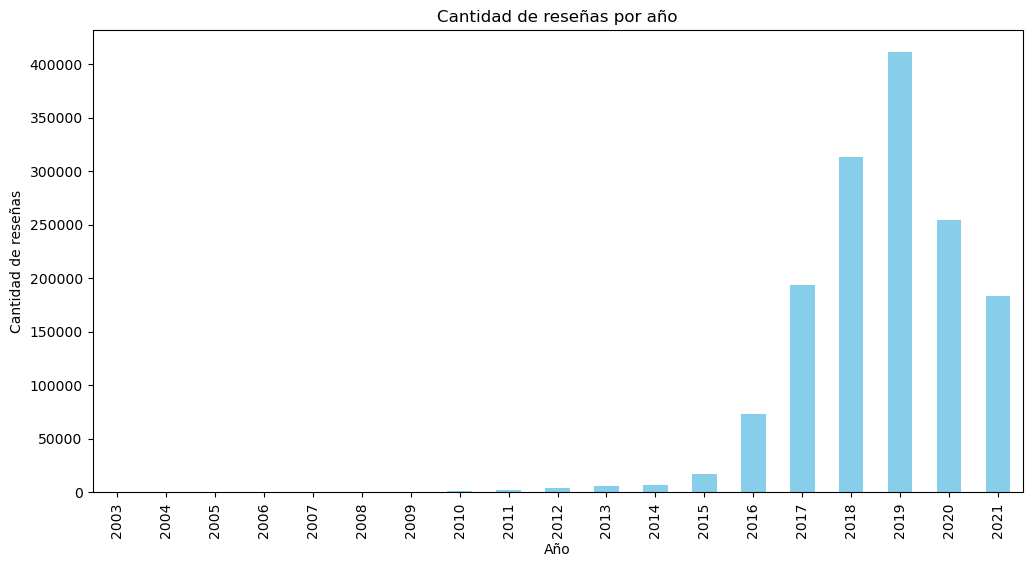

In [81]:
# Gráfico de la cantidad de reseñas por año:
reviews_textual['year'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(12, 6),
    title='Cantidad de reseñas por año',
    xlabel='Año',
    ylabel='Cantidad de reseñas',
    color='skyblue'
)


<Axes: title={'center': 'Promedio de calificaciones por año'}, xlabel='Año', ylabel='Promedio de calificación'>

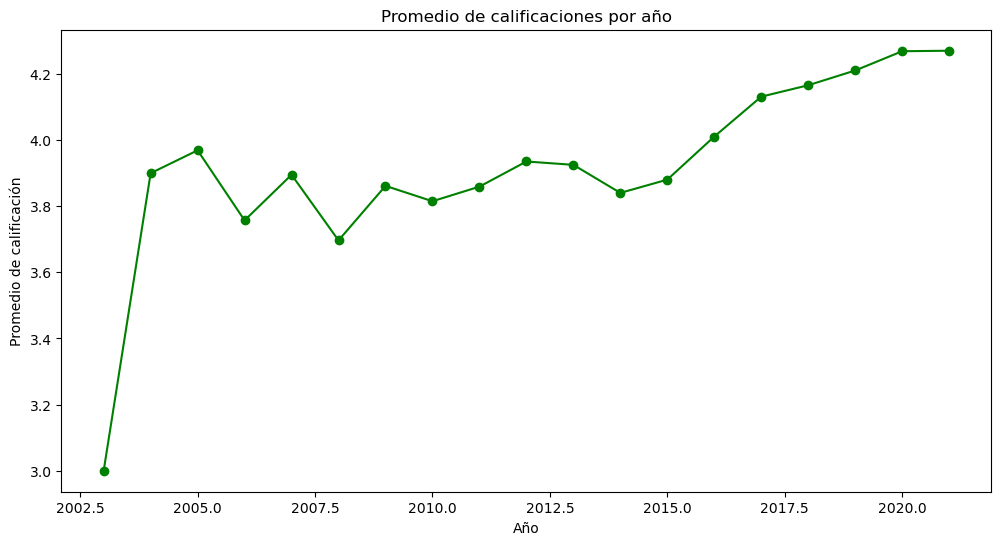

In [82]:
# Gráfico del promedio de calificaciones por año:
reviews_textual.groupby('year')['rating'].mean().plot(
    kind='line',
    figsize=(12, 6),
    title='Promedio de calificaciones por año',
    xlabel='Año',
    ylabel='Promedio de calificación',
    marker='o',
    color='green'
)

In [83]:

# Supongamos que el DataFrame limpio se llama `reviews_textual`

# 1. Eliminar columnas irrelevantes (si las hay)
# Por ejemplo, si `pics` o `resp` no son útiles, las eliminamos
columns_to_drop = ['pics', 'resp']
reviews_textual.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# 2. Asegurarse de que las fechas estén en formato correcto
reviews_textual['date'] = pd.to_datetime(reviews_textual['date'], errors='coerce')

# 3. Asegurarse de que las calificaciones sean numéricas y estén en el rango 1-5
reviews_textual = reviews_textual[(reviews_textual['rating'] >= 1) & (reviews_textual['rating'] <= 5)]

# 4. Revisar texto vacío o irrelevante
# Filtrar reseñas que tienen texto válido
reviews_textual = reviews_textual[reviews_textual['text'].notnull() & (reviews_textual['text'].str.strip() != '')]

# 5. Agregar columna 'year' para facilitar análisis temporal
reviews_textual['year'] = reviews_textual['date'].dt.year

# 6. Renombrar columnas para consistencia (opcional)
reviews_textual.rename(columns={
    'user_id': 'user_id',
    'name': 'business_name',
    'text': 'review_text',
    'date': 'review_date',
    'rating': 'review_rating'
}, inplace=True)

# 7. Verificar duplicados y eliminarlos (si aplica)
reviews_textual.drop_duplicates(inplace=True)

# 8. Guardar el archivo limpio
output_path = 'reviews_cleaned.csv'
reviews_textual.to_csv(output_path, index=False)

print(f"Archivo limpio guardado como: {output_path}")


Archivo limpio guardado como: reviews_cleaned.csv
